In [22]:
import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

# data

## raw ts

In [44]:
y = load_airline()
print(y.head())
print()
print(y.tail())

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

Period
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, dtype: float64


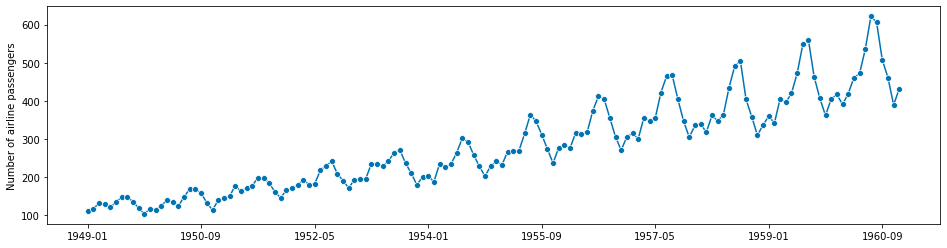

In [45]:
fig, ax = plot_series(y)

## exogeneous data

In [46]:
X = pd.DataFrame(index = y.index)
X.head()

""
1949-01
1949-02
1949-03
1949-04
1949-05


In [48]:
# fig, ax = plot_series(X)

# forecasting horizon

## numpy

In [8]:
# next three years(36 months)
fh = np.arange(1, 37)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [10]:
# second and fifth month ahead
fh = np.array([2, 5])
fh

array([2, 5])

## ForecastingHorizon

In [26]:
# absolute
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961", periods = 36, freq = "M")),
    is_relative = False,
)
fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [27]:
# relative
cutoff = pd.Period("1960-12", freq = "M")
fh = fh.to_relative(cutoff)
fh

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=True)

In [28]:
# absolute
fh = fh.to_absolute(cutoff)
fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [29]:
# fh = ForecastingHorizon([2, 5], is_relative = False)
# fh

# forecasting

In [49]:
# model
forecaster = NaiveForecaster(strategy = "last", sp = 12)

# model fit
forecaster.fit(y, X = X, fh = fh)

NaiveForecaster(sp=12)

In [52]:
y_pred = forecaster.predict(fh = fh, X = X)
y_pred

1961-01    417.0
1961-02    391.0
1961-03    419.0
1961-04    461.0
1961-05    472.0
1961-06    535.0
1961-07    622.0
1961-08    606.0
1961-09    508.0
1961-10    461.0
1961-11    390.0
1961-12    432.0
1962-01    417.0
1962-02    391.0
1962-03    419.0
1962-04    461.0
1962-05    472.0
1962-06    535.0
1962-07    622.0
1962-08    606.0
1962-09    508.0
1962-10    461.0
1962-11    390.0
1962-12    432.0
1963-01    417.0
1963-02    391.0
1963-03    419.0
1963-04    461.0
1963-05    472.0
1963-06    535.0
1963-07    622.0
1963-08    606.0
1963-09    508.0
1963-10    461.0
1963-11    390.0
1963-12    432.0
Freq: M, dtype: float64

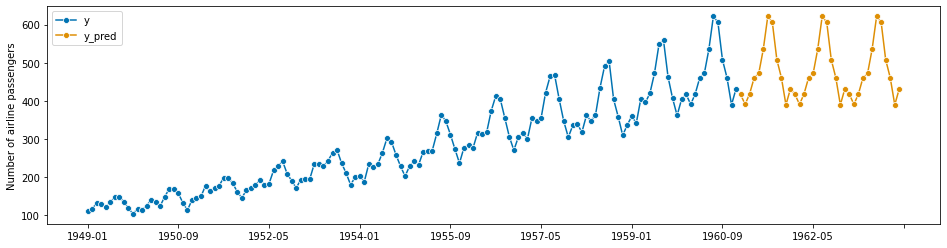

In [53]:
fig, ax = plot_series(y, y_pred, labels = ["y", "y_pred"])